## Preparation

##### Import Functions

In [1]:
import numpy as np
import pandas as pd
from os import listdir
from skimage import io
from matplotlib import pyplot as plt
from skimage.draw import circle, circle_perimeter
from skimage.color import rgb2hsv, rgb2hed, hed2rgb, rgb2gray
from Scripts.LoadImage import LoadImage as LoadImage
from Scripts.Fuzzify import Fuzzify as Fuzzify
from Class.Helper import Helper as Helper
from Scripts.Ki67 import Ki67 as Ki67
import pickle

##### Functions

In [2]:
from skimage.morphology import binary_closing
from skimage.morphology import disk, remove_small_objects
from skimage.color import rgb2gray
from skimage.color import gray2rgb
from skimage import data, io, segmentation, color
import math
import pandas as pd
from skimage import img_as_uint
from skimage.transform import rescale
from skimage import img_as_ubyte
def getRecall(markers, mask):
    radius = 3
    hits = markers.apply(lambda marker: mask[int(marker['y'])-radius:int(marker['y']) + radius + 1, int(marker['x'])-radius:int(marker['x']) + radius + 1].any(),axis=1)
    recall = hits.sum() / len(hits)
    return recall

def validateResults(folder_name, show_images = False):
    path = settings.data_folder_test
    mask = pickle.load(open(settings.backup_folder + "Images/" + "Test_" + folder_name + "_" + settings.class_1 + "_df_results"  + ".p", "rb"))
    mask = mask.sort_index()
    
    file_path = path + folder_name
    base = io.imread(file_path + "/base.png")
    markers = pd.read_csv(file_path + "/markers.csv")
    
    if settings.class_1 == "brown":
        searched_class = 1
    else:
        searched_class = 2
    try:
        width = math.floor(base.shape[1] / 3)
        mask = np.reshape(np.array(mask["Decision Fuzzy"]), (-1, width))
    except:
        width = math.ceil(base.shape[1] / 3)
        mask = np.reshape(np.array(mask["Decision Fuzzy"]), (-1, width))       
        
    mask = [np.ones(3) if j == settings.class_1 else np.zeros(3) for row in mask for j in row]
    mask = np.array(mask)
    mask = mask.reshape((-1, width, 3))
    k = 3
    markers.loc[:, 'x'] = markers.x.apply(lambda x: np.ceil(x / k))
    markers.loc[:, 'y'] = markers.y.apply(lambda y: np.ceil(y / k))

    markers = markers.loc[markers.type == searched_class]
    markers_number = markers.shape[0]
    if show_images:
        fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(70, 45))

    mask_gray = rgb2gray(mask)

    if show_images:
        ax[0].imshow(mask, cmap=plt.cm.gray)
    mask_gray = binary_closing(mask_gray, disk(1))
    if show_images:
        ax[1].imshow(mask_gray, cmap=plt.cm.gray)
    mask_gray = remove_small_objects(mask_gray, 3)
    if show_images:
        ax[2].imshow(mask_gray, cmap=plt.cm.gray)
    mask_gray = binary_closing(mask_gray, disk(2))
    if show_images:
        ax[3].imshow(mask_gray, cmap=plt.cm.gray)

    mask_gray = mask_gray.astype(bool)
    recall = getRecall(markers, mask_gray)
    print(recall)

    io.imsave("Images/" + folder_name + "_" + settings.class_1 + "_processed_mask.png", img_as_uint(mask_gray))
    io.imsave("Images/" + folder_name + "_" + settings.class_1 + "_processed_colored.png", img_as_uint(gray2rgb(mask_gray) * rescale(base, 1.0 / 3.0, anti_aliasing=False)))
    if show_images:
        for center_y, center_x in zip(markers.y, markers.x):
            circy, circx = circle_perimeter(int(center_y), int(center_x), 0)
            base[circy, circx] = (220, 20, 20)
        
        ax[4].imshow(base, cmap=plt.cm.gray)
        plt.show()
        
    mask_rgb = img_as_ubyte(gray2rgb(mask_gray))

    for center_y, center_x in zip(markers.y, markers.x):
        try:
            circy, circx = circle_perimeter(int(center_y), int(center_x), 2)
            mask_rgb[circy, circx] = (220, 20, 20)
        except:
            try:
                circy, circx = circle_perimeter(int(center_y), int(center_x), 0)
                mask_rgb[circy, circx] = (220, 20, 20)
            except:
                continue
    io.imsave("Images/" + folder_name + "_" + settings.class_1 + "_processed_labels.png", img_as_uint(mask_rgb))

    return recall, markers_number

##### Import Settings

In [3]:
# from Settings.SettingsKi67 import Settings as Settings
# import Settings.GeneralSettings as generalSettings
# settings = Settings(generalSettings)

##### Load Image

In [4]:
# loadImage = LoadImage()
# samples_stats, train_stats, test_stats, train_samples = loadImage.worker(settings, test_mode = False)

### Train mode

In [5]:
# fuzzify = Fuzzify()
# changed_decisions, features_number_after_reduct, implicants_number, fuzzify_parameters, execution_time = fuzzify.worker(settings, -1)
# print(implicants_number)

### Test mode

D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


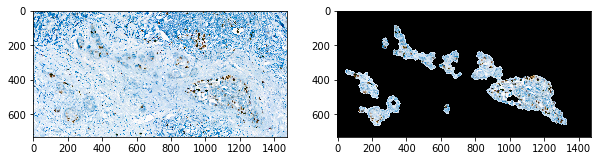

File: ../Data/Ki67-Test/11792-09/base.png
Width: 731	 Height: 1472


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1076032/1076032 [23:03<00:00, 777.67it/s]


-----------------------------------------------------------------------------------
Time: 1487.2402911186218
-----------------------------------------------------------------------------------
0.40636704119850187


D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/11792-09_blue_processed_mask.png is a low contrast image
  warn('%s is a low contrast image' % fname)
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/11792-09_blue_processed_colored.png is a low contrast image
  warn('%s is a low contrast image' % fname)


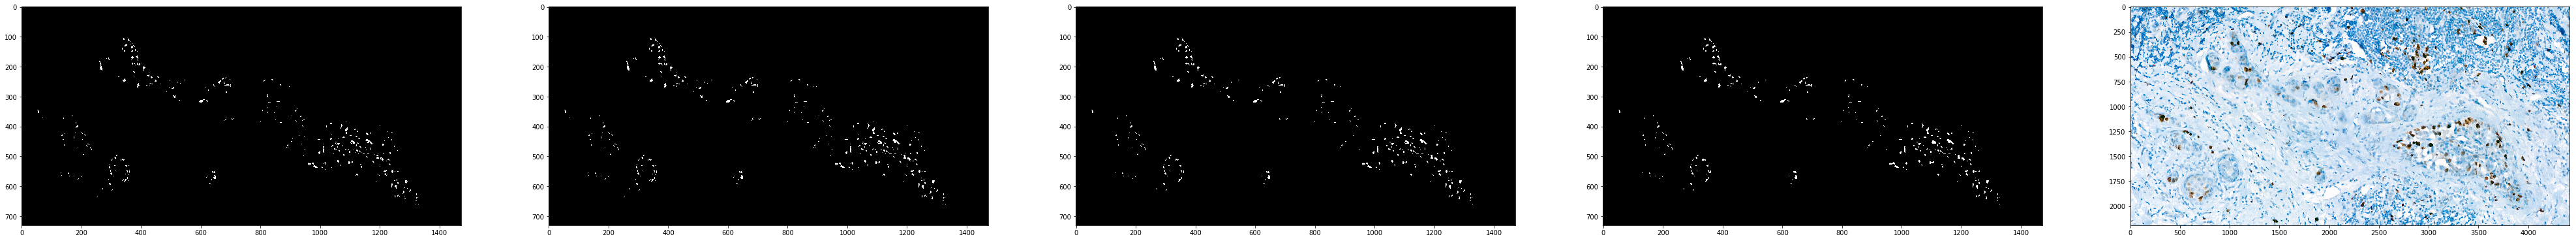

0.40636704119850187


D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


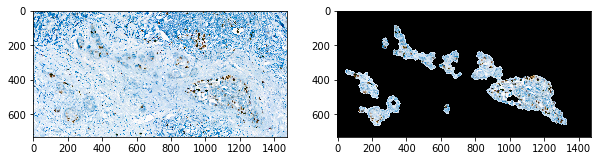

File: ../Data/Ki67-Test/11792-09/base.png
Width: 731	 Height: 1472


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1076032/1076032 [22:12<00:00, 807.82it/s]


-----------------------------------------------------------------------------------
Time: 1432.6707110404968
-----------------------------------------------------------------------------------
0.9206349206349206


D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/11792-09_brown_processed_mask.png is a low contrast image
  warn('%s is a low contrast image' % fname)
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/11792-09_brown_processed_colored.png is a low contrast image
  warn('%s is a low contrast image' % fname)


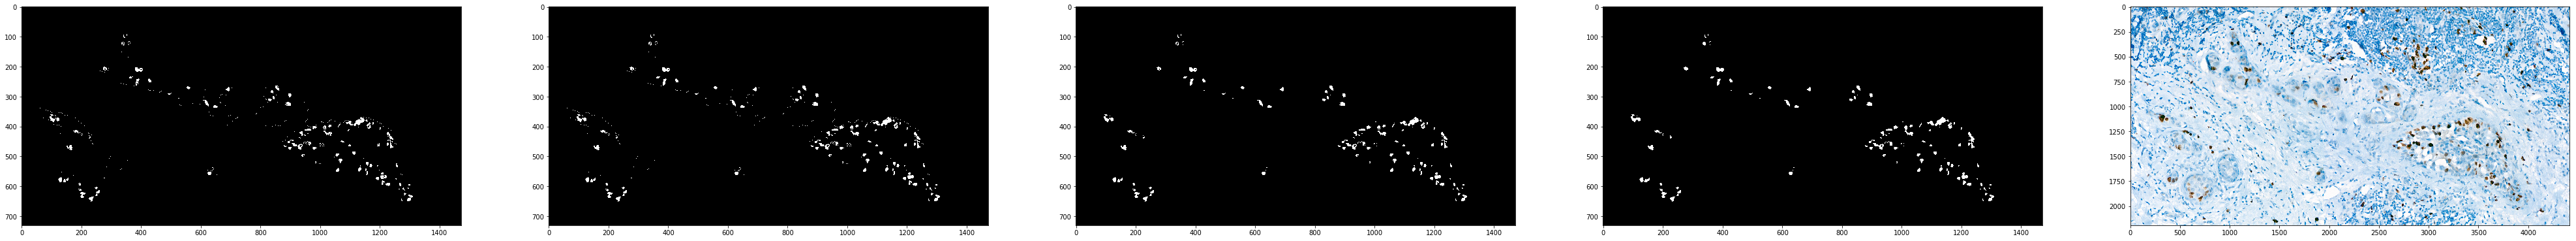

D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/11792-09_brown_processed_labels.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Image Resolution    Pixels Blue Pixels  Blue Recall     Blue Time  \
0   10712-09  2240x2944   6594560        1070     0.429907   1781.064893   
1   10842-05  2112x2768   5846016         881     0.282633    944.083566   
2    1164-03  1504x2112   3176448         723     0.684647    526.004996   
3   11792-09  2192x4416   9679872         534     0.406367   1487.456798   
4    1628-05  3744x3776  14137344         807     0.650558   2411.238772   
5   18583-04  4512x6128  27649536        1490     0.391275   9825.107619   
6   19051-09  1360x1888   2567680        1040     0.301923    483.030239   
7   22137-04  1584x2384   3776256         264     0.439394    604.770898   
8   24774-10  2304x1792   4128768         243     0.271605    645.048066   
9   31374-10  2736x4832  13220352        1353     0.322247   2153.690083   
10    503-05  1584x1616   2559744         134     0.664179    354.683446   
11   5563-04  2544x1568   3988992         914     0.535011    742.617996   
12   6143-05  2144x2112   4528128         219     0.228311    769.179822   
13   6645-03  4848x6576  31880448        2402     0.485012  20108.168930   
14   7468-03  1248x2448   3055104        1329     0.348382    552.260868   
15   7983-03  5200x4496  23379200        1030     0.622330  16754.781798   
16   9817-05  1840x1888   3473920         519     0.342967    551.028127   

   Brown Pixels  Brown Recall   Brown Time  Avg. Recall    Total Time  
0           175      0.777143  1126.435360     0.603525   2907.500252  
1           272      0.794118  1230.119378     0.538376   2174.202944  
2            63      0.793651   523.222469     0.739149   1049.227465  
3           126      0.920635  1432.868218     0.663501   2920.325016  
4           195      0.866667  4232.114327     0.758612   6643.353100  
5           348      0.942529  6209.086696     0.666902  16034.194315  
6            82      0.829268   466.999111     0.565596    950.029350  
7           114      0.877193   599.253226     0.658293   1204.024124  
8            22      0.954545   642.835713     0.613075   1287.883779  
9           207      0.879227  2614.334425     0.600737   4768.024508  
10           26      1.000000   355.529940     0.832090    710.213386  
11           29      0.655172   694.828278     0.595092   1437.446274  
12           41      0.902439   718.433741     0.565375   1487.613563  
13          179      0.865922  4677.438130     0.675467  24785.607060  
14           59      0.898305   590.001728     0.623344   1142.262596  
15          264      0.840909  3542.948141     0.731620  20297.729939  
16          289      0.930796   587.509226     0.636882   1138.537353

D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


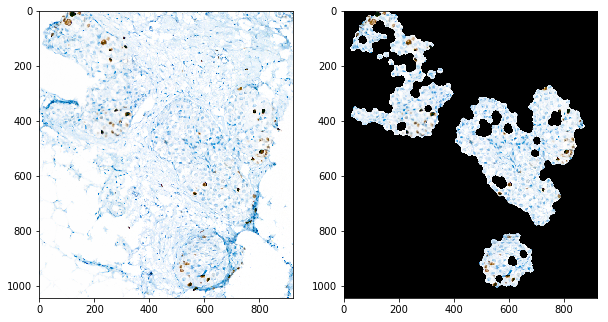

File: ../Data/Ki67-Test/11955-10/base.png
Width: 1045	 Height: 923


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 964535/964535 [21:14<00:00, 757.06it/s]


-----------------------------------------------------------------------------------
Time: 1364.4641234874725
-----------------------------------------------------------------------------------
0.16744186046511628


D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/11955-10_blue_processed_mask.png is a low contrast image
  warn('%s is a low contrast image' % fname)
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/11955-10_blue_processed_colored.png is a low contrast image
  warn('%s is a low contrast image' % fname)


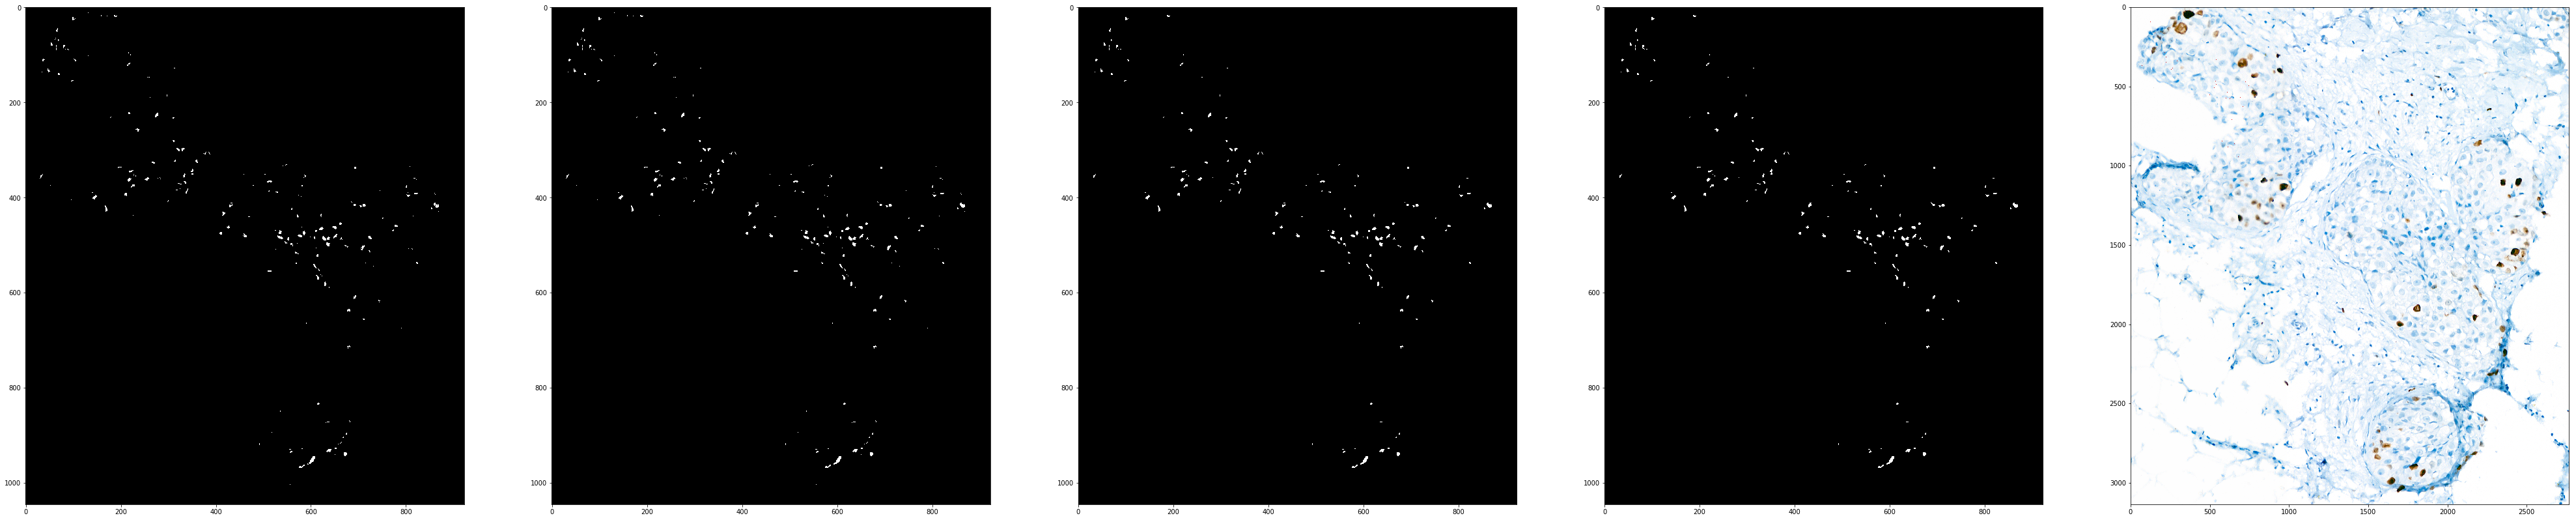

D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/11955-10_blue_processed_labels.png is a low contrast image
  warn('%s is a low contrast image' % fname)


0.16744186046511628


D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


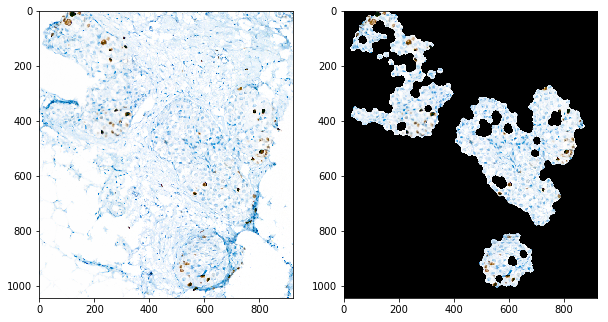

File: ../Data/Ki67-Test/11955-10/base.png
Width: 1045	 Height: 923


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 964535/964535 [20:37<00:00, 779.39it/s]


-----------------------------------------------------------------------------------
Time: 1323.8307898044586
-----------------------------------------------------------------------------------
0.8428571428571429


D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/11955-10_brown_processed_mask.png is a low contrast image
  warn('%s is a low contrast image' % fname)
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/11955-10_brown_processed_colored.png is a low contrast image
  warn('%s is a low contrast image' % fname)


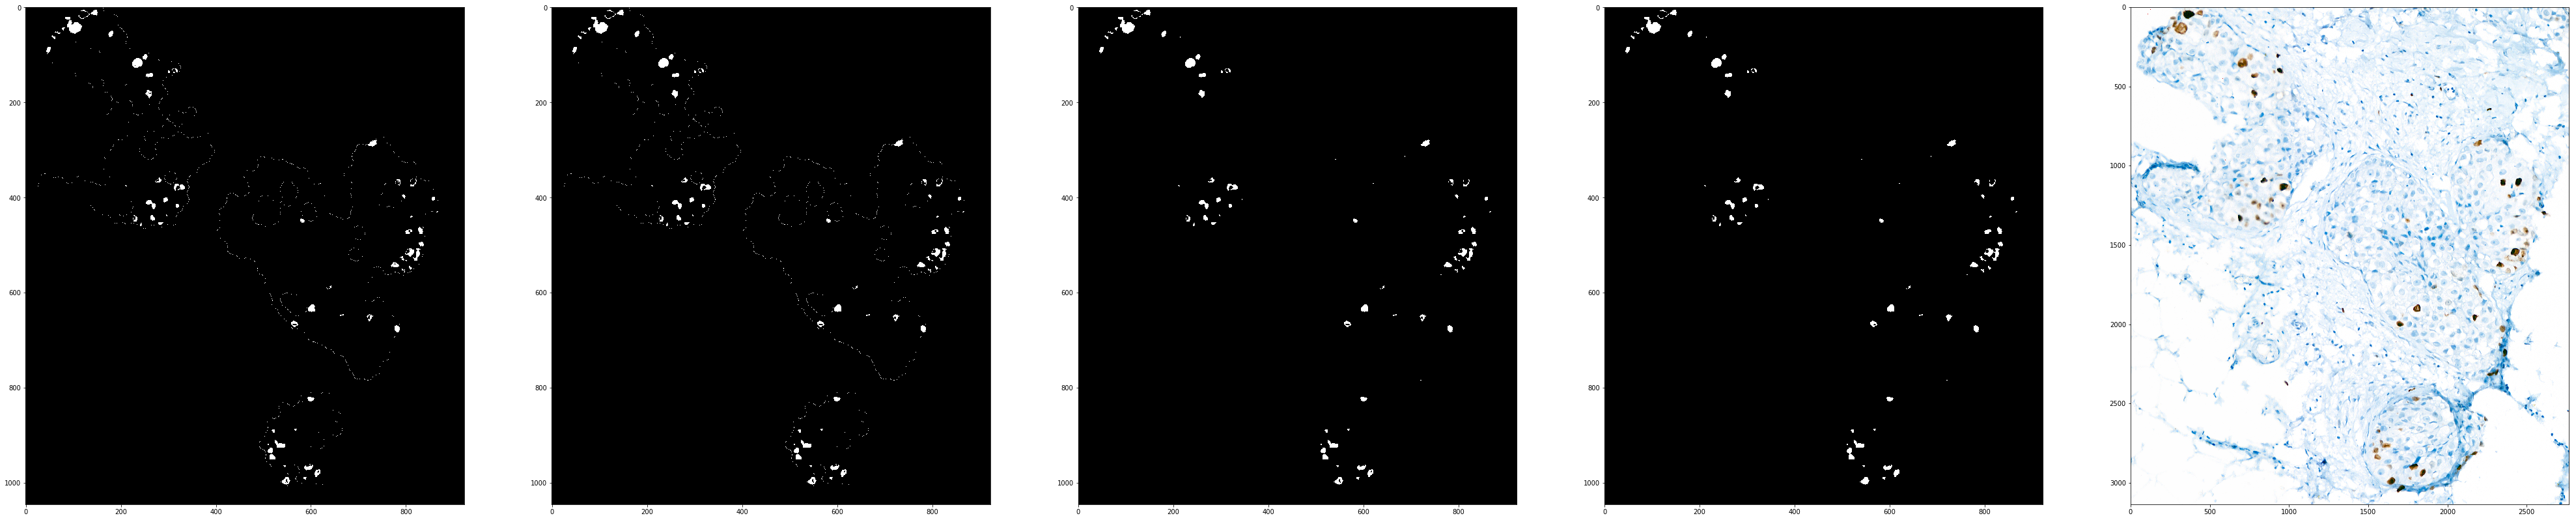

D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/11955-10_brown_processed_labels.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Image Resolution    Pixels Blue Pixels  Blue Recall     Blue Time  \
0   10712-09  2240x2944   6594560        1070     0.429907   1781.064893   
1   10842-05  2112x2768   5846016         881     0.282633    944.083566   
2    1164-03  1504x2112   3176448         723     0.684647    526.004996   
3   11792-09  2192x4416   9679872         534     0.406367   1487.456798   
4   11955-10  3136x2768   8680448         430     0.167442   1364.639630   
5   16247-03  2912x3376   9830912         654     0.405199   1626.677821   
6    1628-05  3744x3776  14137344         807     0.650558   2411.238772   
7   18583-04  4512x6128  27649536        1490     0.391275   9825.107619   
8   19051-09  1360x1888   2567680        1040     0.301923    483.030239   
9   20232-09  2752x2384   6560768         635     0.455118   1119.293749   
10  20847-09  1728x3328   5750784         290     0.644828    830.343657   
11  22137-04  1584x2384   3776256         264     0.439394    604.770898   
12  22210-10  2784x3104   8641536         683     0.550512   1384.225181   
13  24774-10  2304x1792   4128768         243     0.271605    645.048066   
14  31374-10  2736x4832  13220352        1353     0.322247   2153.690083   
15    503-05  1584x1616   2559744         134     0.664179    354.683446   
16   5563-04  2544x1568   3988992         914     0.535011    742.617996   
17   6143-05  2144x2112   4528128         219     0.228311    769.179822   
18   6645-03  4848x6576  31880448        2402     0.485012  20108.168930   
19   7468-03  1248x2448   3055104        1329     0.348382    552.260868   
20   7983-03  5200x4496  23379200        1030     0.622330  16754.781798   
21   9817-05  1840x1888   3473920         519     0.342967    551.028127   

   Brown Pixels  Brown Recall   Brown Time  Avg. Recall    Total Time  
0           175      0.777143  1126.435360     0.603525   2907.500252  
1           272      0.794118  1230.119378     0.538376   2174.202944  
2            63      0.793651   523.222469     0.739149   1049.227465  
3           126      0.920635  1432.868218     0.663501   2920.325016  
4            70      0.842857  1324.019796     0.505150   2688.659426  
5           348      0.850575  1586.824021     0.627887   3213.501843  
6           195      0.866667  4232.114327     0.758612   6643.353100  
7           348      0.942529  6209.086696     0.666902  16034.194315  
8            82      0.829268   466.999111     0.565596    950.029350  
9           212      0.896226  1109.649096     0.675672   2228.942846  
10           25      0.920000   825.238937     0.782414   1655.582594  
11          114      0.877193   599.253226     0.658293   1204.024124  
12          191      0.937173  1392.498644     0.743843   2776.723825  
13           22      0.954545   642.835713     0.613075   1287.883779  
14          207      0.879227  2614.334425     0.600737   4768.024508  
15           26      1.000000   355.529940     0.832090    710.213386  
16           29      0.655172   694.828278     0.595092   1437.446274  
17           41      0.902439   718.433741     0.565375   1487.613563  
18          179      0.865922  4677.438130     0.675467  24785.607060  
19           59      0.898305   590.001728     0.623344   1142.262596  
20          264      0.840909  3542.948141     0.731620  20297.729939  
21          289      0.930796   587.509226     0.636882   1138.537353

D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


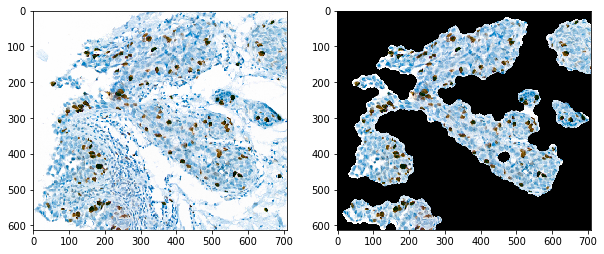

File: ../Data/Ki67-Test/15959-05/base.png
Width: 613	 Height: 709


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 434617/434617 [10:14<00:00, 707.65it/s]


-----------------------------------------------------------------------------------
Time: 654.3588910102844
-----------------------------------------------------------------------------------
0.38081805359661497


D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


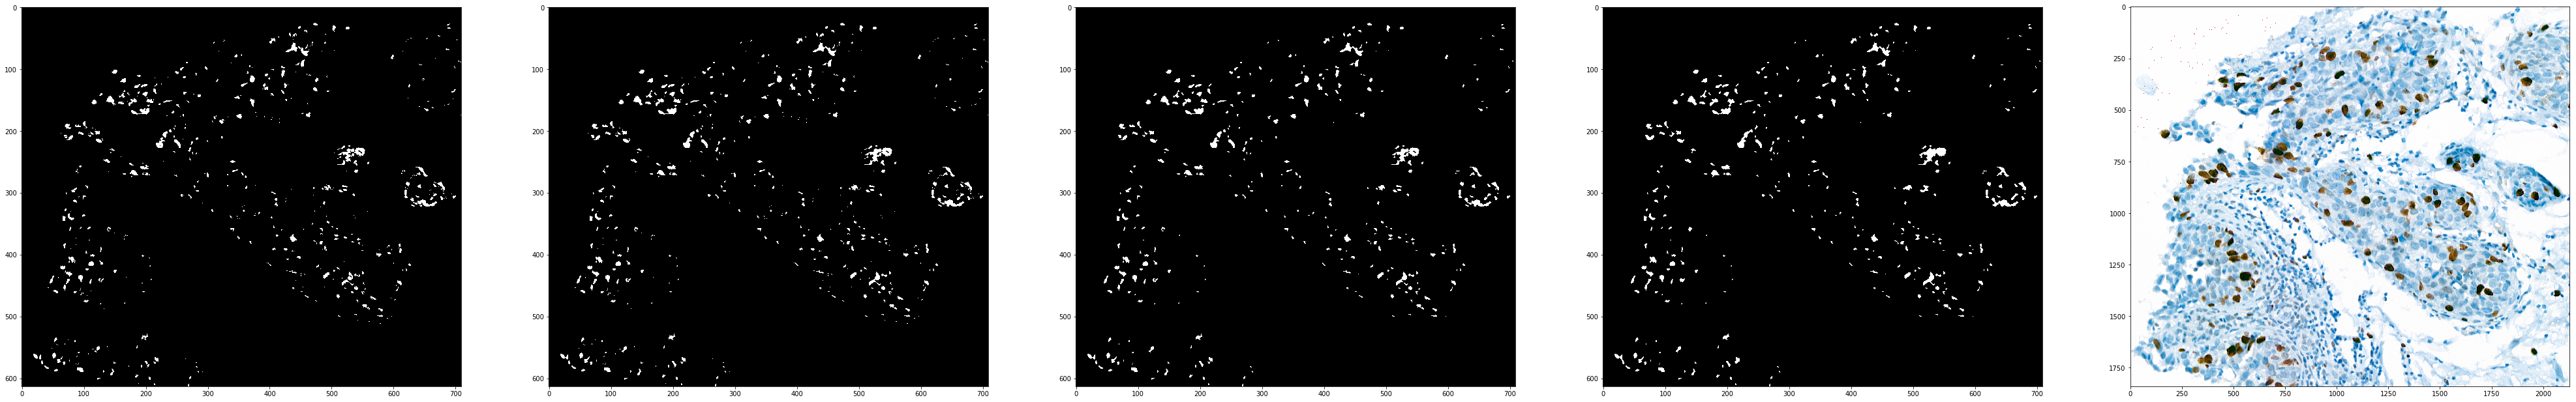

0.38081805359661497


D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


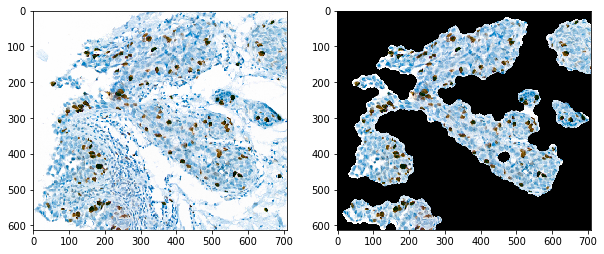

File: ../Data/Ki67-Test/15959-05/base.png
Width: 613	 Height: 709


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 434617/434617 [09:58<00:00, 726.30it/s]


-----------------------------------------------------------------------------------
Time: 637.3584172725677
-----------------------------------------------------------------------------------
0.9516129032258065


D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


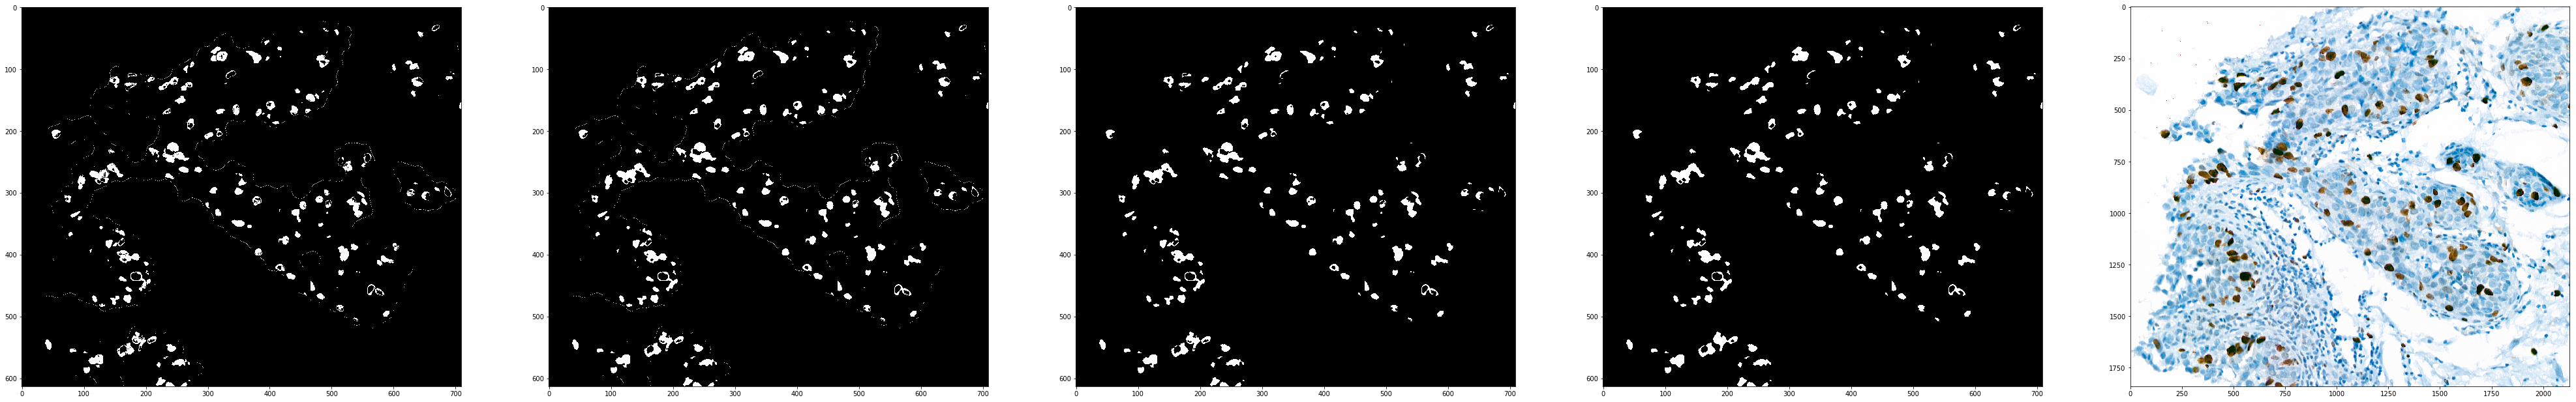

Image Resolution    Pixels Blue Pixels  Blue Recall     Blue Time  \
0   10712-09  2240x2944   6594560        1070     0.429907   1781.064893   
1   10842-05  2112x2768   5846016         881     0.282633    944.083566   
2    1164-03  1504x2112   3176448         723     0.684647    526.004996   
3   11792-09  2192x4416   9679872         534     0.406367   1487.456798   
4   11955-10  3136x2768   8680448         430     0.167442   1364.639630   
5   15959-05  1840x2128   3915520         709     0.380818    654.421394   
6   16247-03  2912x3376   9830912         654     0.405199   1626.677821   
7    1628-05  3744x3776  14137344         807     0.650558   2411.238772   
8   16704-03  2112x3504   7400448        1629     0.255371   1271.850045   
9   17762-05  4080x4160  16972800        4672     0.125000   3013.685602   
10  18583-04  4512x6128  27649536        1490     0.391275   9825.107619   
11  19051-09  1360x1888   2567680        1040     0.301923    483.030239   
12  20232-09  2752x2384   6560768         635     0.455118   1119.293749   
13  20847-09  1728x3328   5750784         290     0.644828    830.343657   
14  22137-04  1584x2384   3776256         264     0.439394    604.770898   
15  22210-10  2784x3104   8641536         683     0.550512   1384.225181   
16  23805-03  2528x3152   7968256         727     0.232462   1233.650193   
17  24774-10  2304x1792   4128768         243     0.271605    645.048066   
18  31374-10  2736x4832  13220352        1353     0.322247   2153.690083   
19    503-05  1584x1616   2559744         134     0.664179    354.683446   
20   5563-04  2544x1568   3988992         914     0.535011    742.617996   
21   6143-05  2144x2112   4528128         219     0.228311    769.179822   
22   6645-03  4848x6576  31880448        2402     0.485012  20108.168930   
23   7468-03  1248x2448   3055104        1329     0.348382    552.260868   
24   7983-03  5200x4496  23379200        1030     0.622330  16754.781798   
25   9817-05  1840x1888   3473920         519     0.342967    551.028127   

   Brown Pixels  Brown Recall   Brown Time  Avg. Recall    Total Time  
0           175      0.777143  1126.435360     0.603525   2907.500252  
1           272      0.794118  1230.119378     0.538376   2174.202944  
2            63      0.793651   523.222469     0.739149   1049.227465  
3           126      0.920635  1432.868218     0.663501   2920.325016  
4            70      0.842857  1324.019796     0.505150   2688.659426  
5           186      0.951613   637.416920     0.666215   1291.838314  
6           348      0.850575  1586.824021     0.627887   3213.501843  
7           195      0.866667  4232.114327     0.758612   6643.353100  
8            21      0.714286  1243.437556     0.484829   2515.287601  
9            42      0.738095  2923.193180     0.431548   5936.878782  
10          348      0.942529  6209.086696     0.666902  16034.194315  
11           82      0.829268   466.999111     0.565596    950.029350  
12          212      0.896226  1109.649096     0.675672   2228.942846  
13           25      0.920000   825.238937     0.782414   1655.582594  
14          114      0.877193   599.253226     0.658293   1204.024124  
15          191      0.937173  1392.498644     0.743843   2776.723825  
16          545      0.873394  1222.973747     0.552928   2456.623941  
17           22      0.954545   642.835713     0.613075   1287.883779  
18          207      0.879227  2614.334425     0.600737   4768.024508  
19           26      1.000000   355.529940     0.832090    710.213386  
20           29      0.655172   694.828278     0.595092   1437.446274  
21           41      0.902439   718.433741     0.565375   1487.613563  
22          179      0.865922  4677.438130     0.675467  24785.607060  
23           59      0.898305   590.001728     0.623344   1142.262596  
24          264      0.840909  3542.948141     0.731620  20297.729939  
25          289      0.930796   587.509226     0.636882   1138.537353

In [6]:
helper = Helper()
import time
from Settings.SettingsKi67 import Settings as Settings
import Settings.GeneralSettings as generalSettings

for name in ["11792-09", "11955-10", "15959-05"]:
    generalSettings.file_name = name
    generalSettings.class_1 = "blue"
    settings = Settings(generalSettings)

    loadImage = LoadImage()
    samples_stats, train_stats, test_stats, train_samples = loadImage.worker(settings, test_mode = True)

    ki67Test = Ki67(settings, settings.s_function_width, False)
    start = time.time()
    ki67Test.noOptymalizationWorker(settings)
    end = time.time()
    blue_time = end - start
    blue_recall, markers_number_blue = validateResults(settings.file_name, True)
    print(blue_recall)
    generalSettings.class_1 = "brown"
    settings = Settings(generalSettings)

    loadImage = LoadImage()
    samples_stats, train_stats, test_stats, train_samples = loadImage.worker(settings, test_mode = True)

    ki67Test = Ki67(settings, settings.s_function_width, False)
    start = time.time()
    ki67Test.noOptymalizationWorker(settings)
    end = time.time()
    brown_time = end - start

    brown_recall, markers_number_brown = validateResults(settings.file_name, True)
    
    base_res = io.imread(settings.data_folder_test + settings.file_name + "/base.png")
    helper.saveKi67Segmentation([settings.file_name, str(base_res.shape[0]) + "x" + str(base_res.shape[1]), base_res.shape[0] * base_res.shape[1], markers_number_blue, blue_recall, blue_time, markers_number_brown, brown_recall, brown_time, (blue_recall + brown_recall)/2, (blue_time + brown_time)])